In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import glob
import sqlite3
import pandas as pd

In [23]:
pulsars = pd.read_csv('./tables/pulsars.csv')

In [ ]:
pulsars.sort_values(['Bs(G)'], ascending=False)

In [ ]:
pulsars['Bs(G)']

In [10]:
new = pd.read_csv('./tables/new.csv')

In [11]:
new

,Pulsar name,Galactic latitude(deg),Galactic longitude(deg),P(ms),P_dot(s/s),E_dot(erg/s),Luminosity(erg/s),Distance(kpc),Age(year),Bs(G),BLC(G),P,D
0,J0205+6449,130.72,3.08,65.727,1.90*10**-13,2.64*1037,2.44*1034,1.95,5.48*103,3.58*10**12,1.16*105,1.90,-13
1,J0248+6021,136.90,0.7,217.107,5.50*10**-14,2.12*1035,2.47*1034,2,6.25*104,3.50*10**12,3.15*103,5.50,-14
2,J0534+2200 (B0531+21),184.56,_5.78,33.635,4.20*10**-13,4.36*1038,6.19*1035,2,1.27*103,3.80*10**12,9.21*105,4.20,-13
3,J0631+1036,201.22,0.45,287.803,1.05*10**-13,1.73*1035,5.57*1033,1,4.36*104,5.55*10**12,2.14*103,1.05,-13
4,J0659+1414 (B0656+14),201.11,8.26,384.919,5.50*10**-14,3.81*1034,2.35*1032,0.28,1.11*105,4.66*10**12,7.52*102,5.50,-14
5,J0729-1448,230.39,1.42,251.691,1.14*10**-13,2.82*1035,1.72*1034,3.52,3.50*104,5.42*10**12,3.13*103,1.14,-13
6,J0742-2822 (B0740-28),243.77,_2.44,166.771,1.68*10**-14,1.43*1035,8.89*1033,2.07,1.57*105,1.69*10**12,3.36*103,1.68,-14
7,J0835-4510 (B0833-45),263.55,_2.79,89.365,1.25*10**-13,6.90*1036,8.93*1034,0.29,1.14*104,3.38*10**12,4.36*104,1.25,-13
8,J0908-4913 (B0906-49),270.27,_1.02,106.755,1.51*10**-14,4.90*1035,3.50*1034,2.57,1.12*105,1.29*10**12,9.72*103,1.51,-14
9,J0940-5428,277.51,_1.29,87.545,3.28*10**-14,1.93*1036,4.22*1033,2.95,4.23*104,1.71*10**12,2.35*104,3.28,-14


In [12]:
limit = 3.2*(10**19)*(new['P(ms)']*new['P']/10**(-new['D'])/1000)**(1/2)

In [13]:
pulsars['Minimum limit(G)'] = limit

In [29]:
pulsars = pd.read_csv('./tables/refined.csv')
pulsars

,Unnamed: 0,Pulsar name,Galactic latitude(deg),Galactic longitude(deg),P(ms),P_dot(s/s),E_dot(erg/s),Luminosity(erg/s),Distance(kpc),Age(year),Bs(G),BLC(G),Comments,Minimum limit(G)
0,0,J0205+6449,130.72,3.08,65.727,1.90*10**-13,2.64*1037,2.440000e+34,1.95,5.48*103,3.580000e+12,1.16*105,NaN,3.580000e+12
1,1,J0248+6021,136.90,0.70,217.107,5.50*10**-14,2.12*1035,2.470000e+34,2,6.25*104,3.500000e+12,3.15*103,NaN,3.500000e+12
2,2,J0534+2200 (B0531+21),184.56,-5.78,33.635,4.20*10**-13,4.36*1038,6.190000e+35,2,1.27*103,3.800000e+12,9.21*105,Crab,3.800000e+12
3,3,J0631+1036,201.22,0.45,287.803,1.05*10**-13,1.73*1035,5.570000e+33,1,4.36*104,5.550000e+12,2.14*103,NaN,5.560000e+12
4,4,J0659+1414 (B0656+14),201.11,8.26,384.919,5.50*10**-14,3.81*1034,2.350000e+32,0.28,1.11*105,4.660000e+12,7.52*102,NaN,4.660000e+12
5,5,J0729-1448,230.39,1.42,251.691,1.14*10**-13,2.82*1035,1.720000e+34,3.52,3.50*104,5.420000e+12,3.13*103,NaN,5.420000e+12
6,6,J0742-2822 (B0740-28),243.77,-2.44,166.771,1.68*10**-14,1.43*1035,8.890000e+33,2.07,1.57*105,1.690000e+12,3.36*103,NaN,1.690000e+12
7,7,J0835-4510 (B0833-45),263.55,-2.79,89.365,1.25*10**-13,6.90*1036,8.930000e+34,0.29,1.14*104,3.380000e+12,4.36*104,Vela,3.380000e+12
8,8,J0908-4913 (B0906-49),270.27,-1.02,106.755,1.51*10**-14,4.90*1035,3.500000e+34,2.57,1.12*105,1.290000e+12,9.72*103,NaN,1.280000e+12
9,9,J0940-5428,277.51,-1.29,87.545,3.28*10**-14,1.93*1036,4.220000e+33,2.95,4.23*104,1.710000e+12,2.35*104,NaN,1.710000e+12


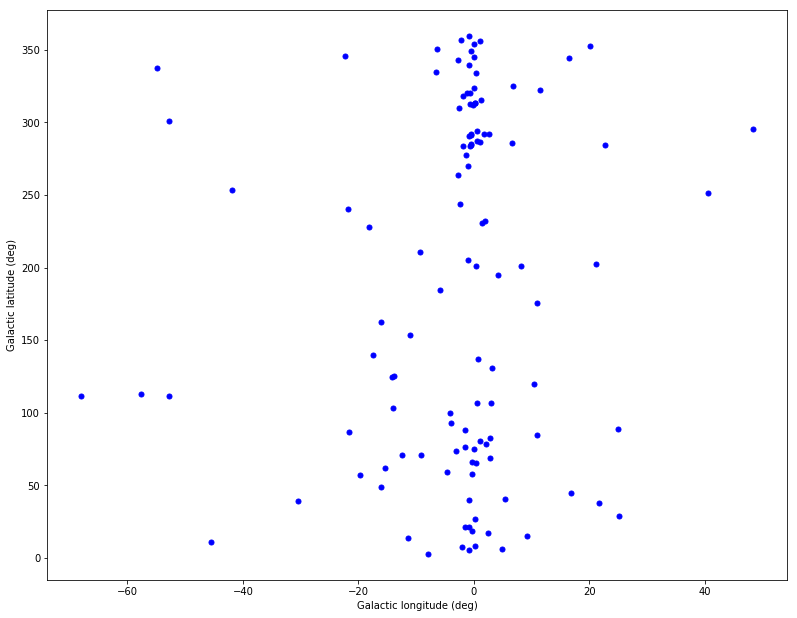

In [30]:
# Plot the positions of the pulsars
fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)                   

fig.tight_layout()                          

ax.set_xlabel("Galactic longitude (deg)")
ax.set_ylabel("Galactic latitude (deg)")

ax.plot(pulsars['Galactic longitude(deg)'], pulsars['Galactic latitude(deg)'],color='b',marker="o",linestyle="None",markersize=5)


In [31]:
fig.savefig('positions', bbox_inches='tight')

In [32]:
pulsars.sort_values(['Bs(G)'], ascending=False)

,Unnamed: 0,Pulsar name,Galactic latitude(deg),Galactic longitude(deg),P(ms),P_dot(s/s),E_dot(erg/s),Luminosity(erg/s),Distance(kpc),Age(year),Bs(G),BLC(G),Comments,Minimum limit(G)
17,17,J1119-6127,292.15,-0.54,408.732,4.03*10**-12,2.33*1036,6.030000e+35,8.4,1.61*103,4.110000e+13,5.53*103,NaN,4.110000e+13
23,23,J1513-5908 (B1509-58),320.32,-1.16,151.578,1.53*10**-12,1.73*1037,6.880000e+34,4.21,1.57*103,1.540000e+13,4.07*104,Comptel,1.540000e+13
41,41,J0007+7303,119.66,10.46,315.893,3.57*10**-13,4.48*1035,9.390000e+34,1.4,1.40*104,1.080000e+13,3.14*103,CTA-1,1.070000e+13
18,18,J1124-5916,292.04,1.75,135.493,7.50*10**-13,1.19*1037,1.700000e+35,4.8,2.86*103,1.020000e+13,3.78*104,NaN,1.020000e+13
63,63,J1838-0537,26.51,0.21,145.709,4.65*10**-13,5.93*1036,1.300000e+37,<24.1,4.97*103,8.330000e+12,2.48*104,NaN,8.330000e+12
68,68,J1958+2846,65.88,-0.35,290.397,2.12*10**-13,3.42*1035,3.740000e+36,<18.5,2.17*104,7.940000e+12,2.98*103,NaN,7.940000e+12
19,19,J1357-6429,309.92,-2.51,166.167,3.57*10**-13,3.07*1036,2.530000e+34,2.5,7.37*103,7.800000e+12,1.56*104,NaN,7.790000e+12
48,48,J1023-5746,284.17,-0.41,111.479,3.82*10**-13,1.09*1037,6.580000e+36,<16.8,4.62*103,6.610000e+12,4.39*104,NaN,6.600000e+12
3,3,J0631+1036,201.22,0.45,287.803,1.05*10**-13,1.73*1035,5.570000e+33,1,4.36*104,5.550000e+12,2.14*103,NaN,5.560000e+12
5,5,J0729-1448,230.39,1.42,251.691,1.14*10**-13,2.82*1035,1.720000e+34,3.52,3.50*104,5.420000e+12,3.13*103,NaN,5.420000e+12


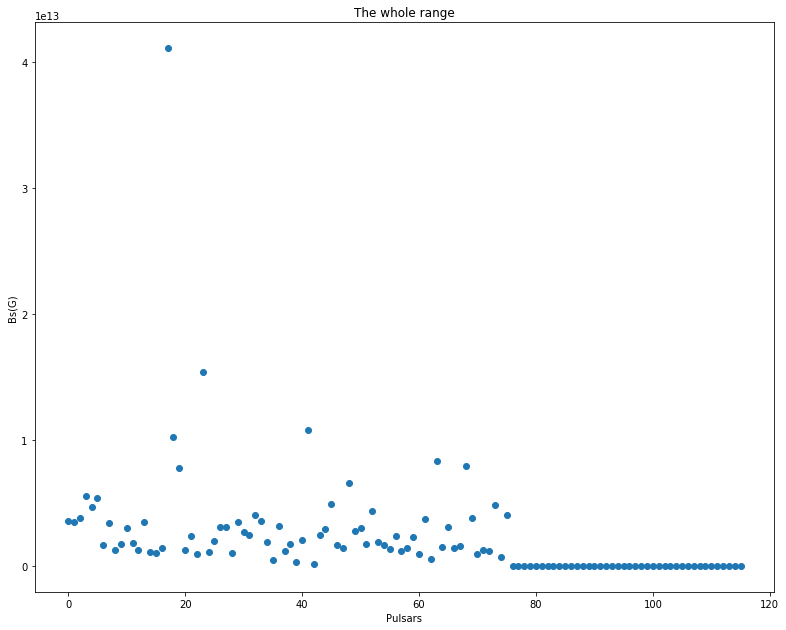

In [62]:
#Range
fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)                  
fig.tight_layout()    

ax.set_xlabel('Pulsars')
ax.set_ylabel('Bs(G)') 
plt.title('The whole range')

my_np_x = np.arange(0,116)
ax.plot(my_np_x, pulsars['Bs(G)'],marker="o",linestyle="None",markersize=6)

In [63]:
fig.savefig('whole range', bbox_inches='tight')

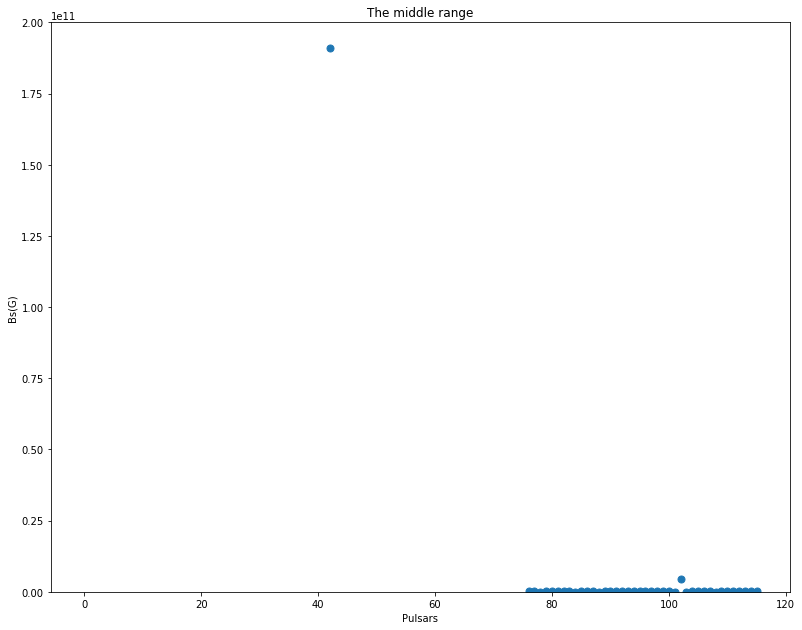

In [88]:
fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)                  
fig.tight_layout()    

ax.set_xlabel('Pulsars')
ax.set_ylabel('Bs(G)') 
plt.title('The middle range')

ax.set_ylim(0,200000000000)
my_np_x = np.arange(0,116)
ax.plot(my_np_x, pulsars['Bs(G)'],marker="o",linestyle="None",markersize=7)

In [89]:
fig.savefig('middle range', bbox_inches='tight')

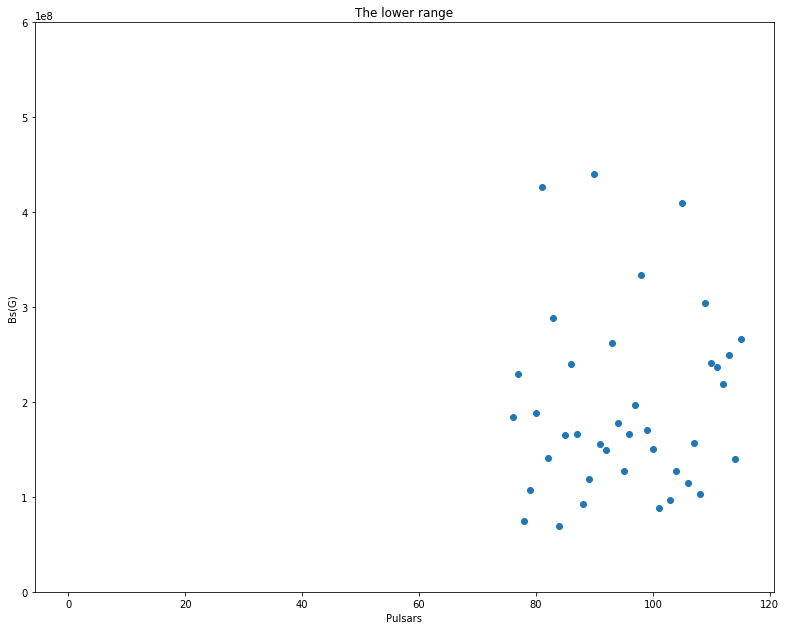

In [96]:
fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)                  
fig.tight_layout()    

ax.set_xlabel('Pulsars')
ax.set_ylabel('Bs(G)') 
plt.title('The lower range')

ax.set_ylim(0,600000000)
my_np_x = np.arange(0,116)
ax.plot(my_np_x, pulsars['Bs(G)'],marker="o",linestyle="None",markersize=6)

In [97]:
fig.savefig('lower range', bbox_inches='tight')

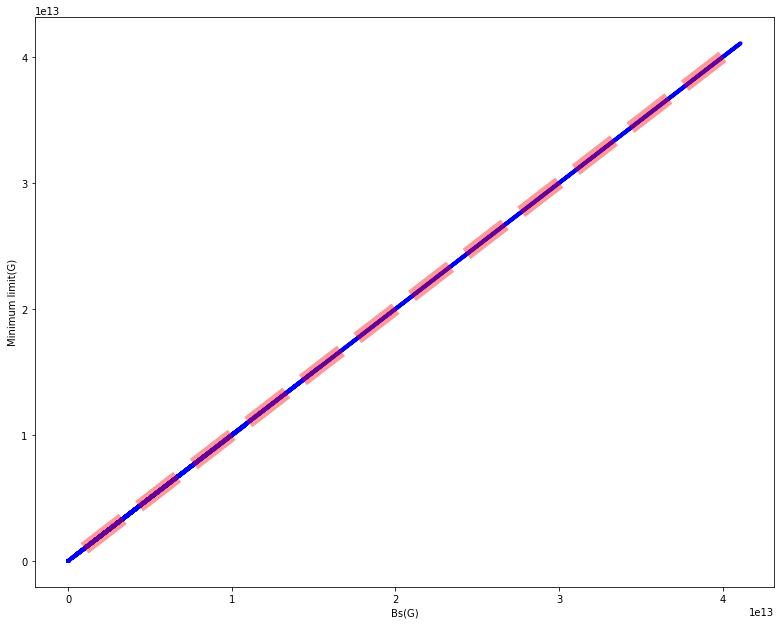

In [90]:
fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)                  
fig.tight_layout()                          

ax.set_xlabel('Bs(G)')
ax.set_ylabel('Minimum limit(G)') 

ax.plot(pulsars['Bs(G)'], pulsars['Minimum limit(G)'], color='b', marker='None', linestyle='-', linewidth = 4)
my_np_x = np.linspace(1000000000000,40000000000000,2000)
my_np_y1= my_np_x
ax.plot(my_np_x, my_np_y1, color='r', marker='None', linestyle='--', linewidth = 13, alpha=0.4)

In [91]:
fig.savefig('limit', bbox_inches='tight')

In [42]:
ratio = pulsars['Bs(G)'] / (pulsars['P(ms)']/1000)**2

In [43]:
pulsars['Luminosity Ratio'] = ratio

In [44]:
pulsars

,Unnamed: 0,Pulsar name,Galactic latitude(deg),Galactic longitude(deg),P(ms),P_dot(s/s),E_dot(erg/s),Luminosity(erg/s),Distance(kpc),Age(year),Bs(G),BLC(G),Comments,Minimum limit(G),Luminosity Ratio
0,0,J0205+6449,130.72,3.08,65.727,1.90*10**-13,2.64*1037,2.440000e+34,1.95,5.48*103,3.580000e+12,1.16*105,NaN,3.580000e+12,8.286963e+14
1,1,J0248+6021,136.90,0.70,217.107,5.50*10**-14,2.12*1035,2.470000e+34,2,6.25*104,3.500000e+12,3.15*103,NaN,3.500000e+12,7.425409e+13
2,2,J0534+2200 (B0531+21),184.56,-5.78,33.635,4.20*10**-13,4.36*1038,6.190000e+35,2,1.27*103,3.800000e+12,9.21*105,Crab,3.800000e+12,3.358928e+15
3,3,J0631+1036,201.22,0.45,287.803,1.05*10**-13,1.73*1035,5.570000e+33,1,4.36*104,5.550000e+12,2.14*103,NaN,5.560000e+12,6.700425e+13
4,4,J0659+1414 (B0656+14),201.11,8.26,384.919,5.50*10**-14,3.81*1034,2.350000e+32,0.28,1.11*105,4.660000e+12,7.52*102,NaN,4.660000e+12,3.145192e+13
5,5,J0729-1448,230.39,1.42,251.691,1.14*10**-13,2.82*1035,1.720000e+34,3.52,3.50*104,5.420000e+12,3.13*103,NaN,5.420000e+12,8.555865e+13
6,6,J0742-2822 (B0740-28),243.77,-2.44,166.771,1.68*10**-14,1.43*1035,8.890000e+33,2.07,1.57*105,1.690000e+12,3.36*103,NaN,1.690000e+12,6.076390e+13
7,7,J0835-4510 (B0833-45),263.55,-2.79,89.365,1.25*10**-13,6.90*1036,8.930000e+34,0.29,1.14*104,3.380000e+12,4.36*104,Vela,3.380000e+12,4.232352e+14
8,8,J0908-4913 (B0906-49),270.27,-1.02,106.755,1.51*10**-14,4.90*1035,3.500000e+34,2.57,1.12*105,1.290000e+12,9.72*103,NaN,1.280000e+12,1.131914e+14
9,9,J0940-5428,277.51,-1.29,87.545,3.28*10**-14,1.93*1036,4.220000e+33,2.95,4.23*104,1.710000e+12,2.35*104,NaN,1.710000e+12,2.231174e+14


In [73]:
my_fit1 = np.polyfit(np.log10(pulsars['Luminosity Ratio']),np.log10(pulsars['Luminosity(erg/s)']),1)
fitted_polynomial = np.poly1d(my_fit1)

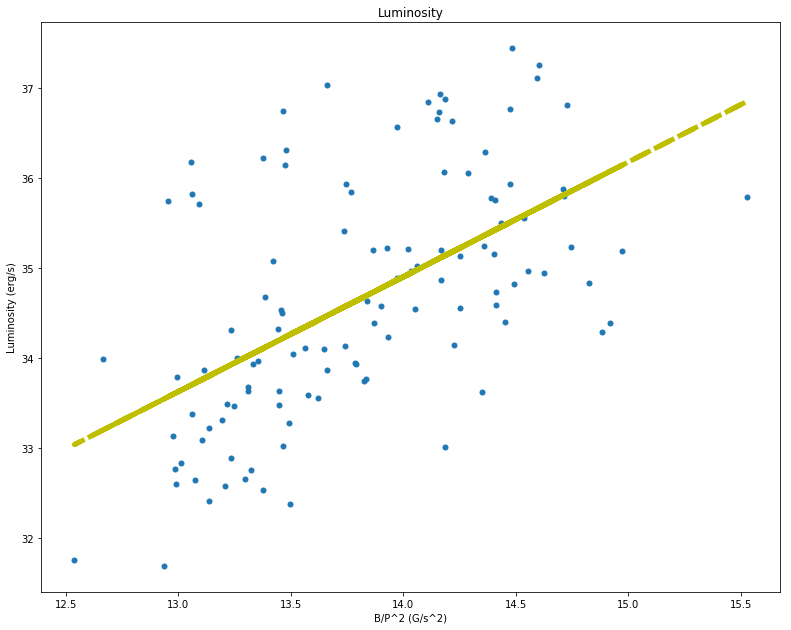

In [74]:

fig,ax = plt.subplots(1,1)                    
fig.set_size_inches(11,8.5)                  
fig.tight_layout()    

ax.set_xlabel('B/P^2 (G/s^2)')
ax.set_ylabel('Luminosity (erg/s)') 
plt.title('Luminosity')



ax.plot(np.log10(pulsars['Luminosity Ratio']), np.log10(pulsars['Luminosity(erg/s)']),marker="o",linestyle="None",markersize=5)
ax.plot(np.log10(pulsars['Luminosity Ratio']), fitted_polynomial(np.log10(pulsars['Luminosity Ratio'])),
        linewidth=5, color='y', linestyle='--',
        label="Fit to Data")

In [75]:
fig.savefig('luminosity', bbox_inches='tight')